In [9]:
"""
Malaysian Election data Cluster Analysis by Jamie K
Questions to explore: 
1. Treating each age group as a dimension, are there (clustering) patterns for each constituency?
2. Are these patterns indicative of the outcome of the winning party?

"""
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
import warnings

warnings.filterwarnings('ignore')
style.use("ggplot")
%matplotlib notebook

### Data Treatment & Dimension Reduction
Treating each age group as a distinctive dimension, let’s run an unsupervised Machine Learning algorithm to see if there are patterns within the constituencies that led to different electoral outcomes.

There are 8 age groups (8 dimensions). For visualization & exploration purposes, I'm going to reduce 8 Dimensions into 3 Dimensions. However, the trade-off is I won't be able to interpret these results according to human-readable class labels - instead, we will be able to visually see if there are clustering patterns on these new dimensions.

In [2]:
ge14_full = pd.read_excel("Tindak_GE14_Demographics_2018.xlsx", sheet_name = "age")

ge14_full = ge14_full[['namaparlimen','21 - 30 (%)','31 - 40 (%)','41 - 50 (%)',
                       '51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)',
                       'GE 2018 COALITION WINNER']]

In [3]:
ge14_full.loc[:,"GE 2018 COALITION WINNER"] = pd.Categorical(ge14_full.loc[:,"GE 2018 COALITION WINNER"])
ge14_full.loc[:,'coded_winner'] = ge14_full.loc[:,'GE 2018 COALITION WINNER'].cat.codes
ge14_full.loc[:,'meanshift_grp']= np.nan
ge14_full.set_index('namaparlimen', inplace = True)

In [4]:
X_full = np.array(ge14_full[['21 - 30 (%)','31 - 40 (%)','41 - 50 (%)',
                             '51 - 60 (%)','61 - 70 (%)','71 - 80 (%)',
                             '81 - 90 (%)','Above 90 (%)'
                            ]])
X_full = preprocessing.scale(X_full) #Convert data to Gaussian dataset (standard normal distribution)
Y_full = np.array(ge14_full['coded_winner']) #Convert winning coalition to numbered categories

In [5]:
lda = LinearDiscriminantAnalysis(n_components=3) # Intiate an LDA class that will reduce the data down to 3 dimensions
X_lda = lda.fit(X_full, Y_full).transform(X_full) # run an LDA and use it to transform the features

In [6]:
print('LDA Dimension reduction descriptive points')
print('Original number of dimensions:', X_full.shape[1])
print('Reduced number of dimensions:', X_lda.shape[1])
print('Explained Variance Ratio:',lda.explained_variance_ratio_) # View the ratio of explained variance by the 3 new dimensions
print('Sum of Explained Variance Ratio:',sum(lda.explained_variance_ratio_))

LDA Dimension reduction descriptive points
Original number of dimensions: 8
Reduced number of dimensions: 3
Explained Variance Ratio: [0.55085994 0.31043564 0.06793327]
Sum of Explained Variance Ratio: 0.929228853151054


### Interpreting the outcome of dimension reduction & begin cluster exploration
The sum of explained variance is 92%. A layman's interpretation of this metric: our new 3 Dimensional dataset maintains 92%  'richness' of the original data set (8 Dimensions) - which is a bareable trade-off for ability to visually explore the clusters. Note: the usual acceptable standard of explained variance is 95%.

After reducing the dimension space, let's see if there are any clustering patterns in this new dimensional space.

For this purpose, we shall use hierarchal clustering; an unsupervised clustering method to allow the machine to analyze ‘without guidance’. This is similar to k-means with one key difference: it will not require the user to input a  specific number of clusters. Hierarchal clustering is a data clustering method that allows you to converge data points into the data clusters, with a specific data center (centroids). 

Ideally, since there are 6 unique types of political party outcomes in GE14 (Y2018 elections), we would like to see 6 distinct centers in the date points – that way, one can clearly state different age make-up of the constituency led to different electoral outcomes.

In [7]:
clf_full = MeanShift() #Initiate MeanShift class
colors = 10*['r','g','b','c','k','y','m'] #Assign array of 70 colors

clf_full.fit(X_lda) #Fit Meanshift unto lda-reduced dataset

labels = clf_full.labels_
cluster_centers = clf_full.cluster_centers_

for i in range(len(X_lda)):
    ge14_full['meanshift_grp'].iloc[i] = labels[i]

MeanShift hierarchical clustering output
Number of clusters: 3


<IPython.core.display.Javascript object>


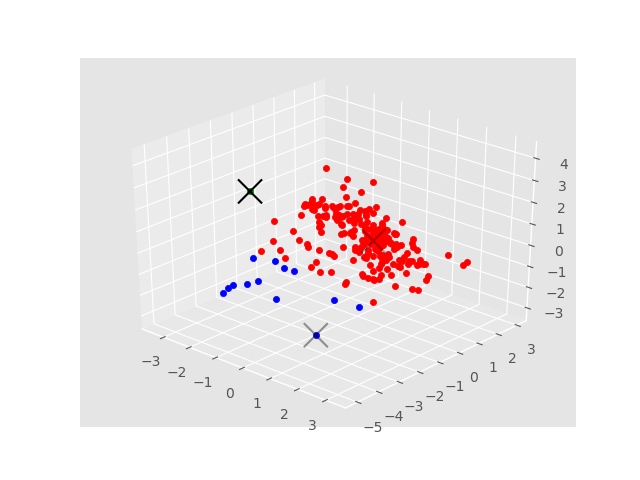

In [10]:
print('MeanShift hierarchical clustering output')
print('Number of clusters:', len(ge14_full['meanshift_grp'].unique()))

#Plot clusters in our new 3 Dimensions
fig = plt.figure(num = "Constituency Clustering by Age Groups in GE14")
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X_lda)):
    ax.scatter(X_lda[i][0], X_lda[i][1], X_lda[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=300, linewidths = 5, zorder=10)

plt.show()

### Interpreting the outcome of cluster exercise
In an ideal setting, we would see 6 clusters (6 distinctive data patterns) for the 6 different types of electoral outcome, however we only see 3 clusters. In this 3-dimensional plot, you can explore these clusters.

Having 3 clusters for 6 possible electoral outcomes suggests all constituencies are very homogeneous (very identical) in terms of age splits. Indeed they are: an average of 61% of voters in each constituency is below 50 years old.